In [1]:
import torch
import pandas as pd
import numpy as np

from copy import deepcopy
from lib.churn_prediction import ChurnPrediction

In [2]:
df_all_data = pd.read_csv('D:\data\churn_prediction//Churn_Modelling.csv')
churn_prediction = ChurnPrediction(df_all_data, is_display_detail = False)

ChartVisualizer object created
ChurnPrediction object created


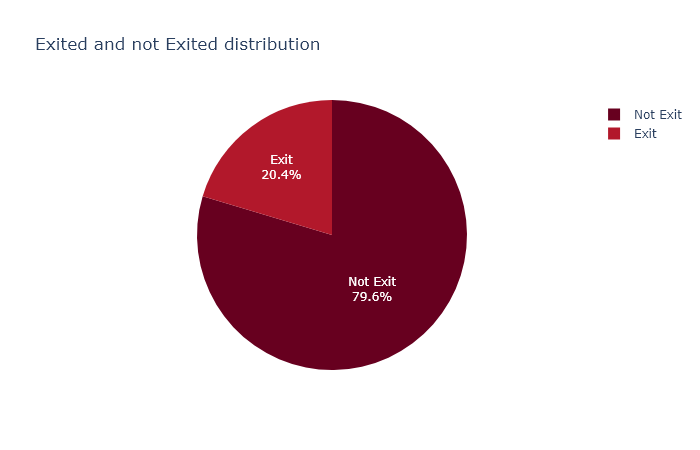

The dataset contain 10000 data and only 20.4% data is 'Exit'


In [3]:
churn_prediction.show_label_distribution()
print(f"The dataset contain {churn_prediction._NNDataP.df_all_data.shape[0]} data and only 20.4% data is 'Exit'")

In [4]:
churn_prediction.show_available_parmas_options()

['baseline', 'with_class_weight', 'with_oversampling']


In [5]:
churn_prediction_with_class_weight = deepcopy(churn_prediction)
churn_prediction_with_oversampling = deepcopy(churn_prediction)

In [6]:
churn_prediction.select_parmas('baseline')
print('')
churn_prediction_with_class_weight.select_parmas('with_class_weight')
print('')
churn_prediction_with_oversampling.select_parmas('with_oversampling')

number of combinations: 2


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w
0,Adam,0.02,False,1000,True,None,0.4,"[200, 100, 50]",None
1,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]",None



number of combinations: 3


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w
0,Adam,0.02,False,1000,True,"[tensor(1.), tensor(4.)]",0.4,"[200, 100, 50]",None
1,Adam,0.02,False,1000,True,"[tensor(1.), tensor(3.)]",0.4,"[200, 100, 50]",None
2,Adam,0.02,False,1000,True,"[tensor(1.), tensor(2.)]",0.4,"[200, 100, 50]",None



number of combinations: 3


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w
0,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 4]"
1,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 3]"
2,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 2]"


In [7]:
is_log_in_tsboard = True

# Baseline (not use class weight and oversampling)
# use Min loss to select the best model

In [24]:
churn_prediction.cross_validate(cv_strategy = 'min_loss', num_max_epochs = 100, patience = 15,
                                is_log_in_tsboard = is_log_in_tsboard)

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_True_os_w_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 31

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_True_os_w_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 48

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_True_os_w_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 50

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_True_os_w_None
ChurnPredictionDataset object c

In [25]:
churn_prediction.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,list_cv_loss,list_mean_cv_loss,list_std_cv_loss,list_cv_f1,list_mean_cv_f1,list_std_cv_f1,model_index,best_cv_index
0,Adam,0.02,False,1000,True,None,0.4,"[200, 100, 50]",None,"[0.3448488116264343, 0.32601553201675415, 0.35...",0.336636,0.010710,"[0.8044767875068619, 0.8341749065106285, 0.814...",0.821837,0.012018,0,4
1,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]",None,"[0.33775554597377777, 0.32104794681072235, 0.3...",0.336854,0.014172,"[0.8306307839589038, 0.8328859572936511, 0.816...",0.829572,0.006705,1,1


In [26]:
churn_prediction.test_model(dataset = 'test_set')
churn_prediction.show_classification_report(dataset = 'test_set')

NNModel object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.870516,0.974890,0.919751,1593.0000
Exited,0.814815,0.432432,0.565008,407.0000
accuracy,0.864500,0.864500,0.864500,0.8645
macro avg,0.842665,0.703661,0.742380,2000.0000
weighted avg,0.859181,0.864500,0.847561,2000.0000


In [27]:
churn_prediction.test_model(dataset = 'train_valid_set')
churn_prediction.show_classification_report(dataset = 'train_valid_set')

NNModel object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.872517,0.972370,0.919742,6370.000000
Exited,0.804661,0.444785,0.572896,1630.000000
accuracy,0.864875,0.864875,0.864875,0.864875
macro avg,0.838589,0.708578,0.746319,8000.000000
weighted avg,0.858692,0.864875,0.849072,8000.000000


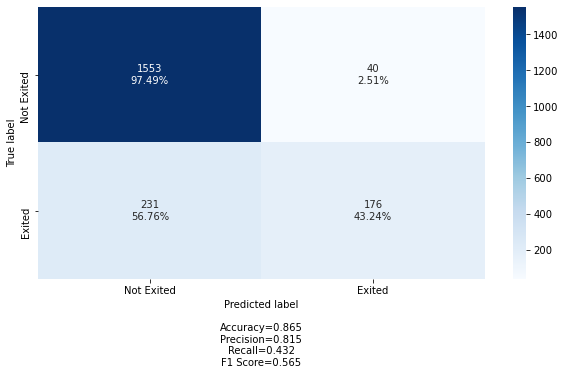

In [28]:
churn_prediction.plot_cf_matrix('test_set', normalize = 'true')

# Assign class weight
# use Max f1 score to select best the model

In [13]:
churn_prediction_with_class_weight.cross_validate(cv_strategy = 'max_f1', num_max_epochs = 100, patience = 15,
                                                  is_log_in_tsboard = is_log_in_tsboard)

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_cw_1.00_4.00_bs_1000_shuffle_True_os_w_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 35

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_cw_1.00_4.00_bs_1000_shuffle_True_os_w_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 53

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_cw_1.00_4.00_bs_1000_shuffle_True_os_w_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 33

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_cw_1.00_4.00_bs_1000_shuffle_True_os_w_None
Chu

In [14]:
churn_prediction_with_class_weight.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,list_cv_loss,list_mean_cv_loss,list_std_cv_loss,list_cv_f1,list_mean_cv_f1,list_std_cv_f1,model_index,best_cv_index
2,Adam,0.02,False,1000,True,"[tensor(1.), tensor(2.)]",0.4,"[200, 100, 50]",None,"[0.42852818965911865, 0.4137851148843765, 0.45...",0.421888,0.017806,"[0.8196504722398504, 0.8129037304376712, 0.765...",0.805483,0.024161,2,4
1,Adam,0.02,False,1000,True,"[tensor(1.), tensor(3.)]",0.4,"[200, 100, 50]",None,"[0.46445508301258087, 0.4415094703435898, 0.47...",0.452917,0.015532,"[0.7932365191037062, 0.7989195955688098, 0.804...",0.792432,0.008727,1,2
0,Adam,0.02,False,1000,True,"[tensor(1.), tensor(4.)]",0.4,"[200, 100, 50]",None,"[0.4698477238416672, 0.44587694108486176, 0.48...",0.458647,0.016315,"[0.7653125671946803, 0.7903621984768158, 0.748...",0.774866,0.016221,0,3


In [15]:
churn_prediction_with_class_weight.test_model(dataset = 'test_set')
churn_prediction_with_class_weight.show_classification_report(dataset = 'test_set')

NNModel object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.903883,0.891400,0.897598,1593.000
Exited,0.596737,0.628993,0.612440,407.000
accuracy,0.838000,0.838000,0.838000,0.838
macro avg,0.750310,0.760196,0.755019,2000.000
weighted avg,0.841379,0.838000,0.839568,2000.000


In [16]:
churn_prediction_with_class_weight.test_model(dataset = 'train_valid_set')
churn_prediction_with_class_weight.show_classification_report(dataset = 'train_valid_set')

NNModel object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.907390,0.898273,0.902808,6370.000
Exited,0.617473,0.641718,0.629362,1630.000
accuracy,0.846000,0.846000,0.846000,0.846
macro avg,0.762432,0.769995,0.766085,8000.000
weighted avg,0.848319,0.846000,0.847094,8000.000


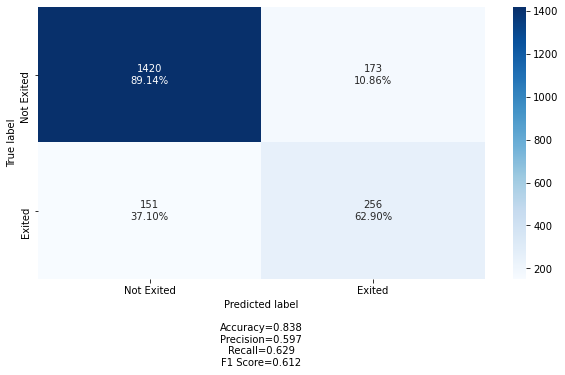

In [17]:
churn_prediction_with_class_weight.plot_cf_matrix('test_set', normalize = 'true')

# Oversampling
# use Max f1 score to select best the model

In [18]:
churn_prediction_with_oversampling.cross_validate(cv_strategy = 'max_f1', num_max_epochs = 100, patience = 15,
                                                  is_log_in_tsboard = is_log_in_tsboard)

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 4]


C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:139: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 21

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 4]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 31

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 4]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 25

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 4]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 24

NNModel object created
train and valid model:

C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:139: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Early stopping at 27

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 3]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 33

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 3]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 21

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 3]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 37

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 3]
C

C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:139: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Early stopping at 24

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 2]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 22

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 2]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 43

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 2]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 26

NNModel object created
train and valid model:  _do_p_0.4_ly_s_[[200, 100, 50]]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_False_os_w_[1 2]
C

In [19]:
churn_prediction_with_oversampling.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,list_cv_loss,list_mean_cv_loss,list_std_cv_loss,list_cv_f1,list_mean_cv_f1,list_std_cv_f1,model_index,best_cv_index
2,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 2]","[0.35415786504745483, 0.3386594355106354, 0.37...",0.351640,0.014275,"[0.7754409209057066, 0.745205943080454, 0.8103...",0.782463,0.022947,2,2
1,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 3]","[0.3798675239086151, 0.36425746977329254, 0.40...",0.380443,0.014440,"[0.7690419840992181, 0.7972487370762056, 0.686...",0.756082,0.042732,1,3
0,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 4]","[0.4279157221317291, 0.4132396876811981, 0.422...",0.421352,0.007600,"[0.6598598670223396, 0.767827201102084, 0.7077...",0.721134,0.038686,0,1


In [20]:
churn_prediction_with_oversampling.test_model(dataset = 'test_set')
churn_prediction_with_oversampling.show_classification_report(dataset = 'test_set')

NNModel object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.890000,0.949780,0.918919,1593.0000
Exited,0.733333,0.540541,0.622348,407.0000
accuracy,0.866500,0.866500,0.866500,0.8665
macro avg,0.811667,0.745160,0.770633,2000.0000
weighted avg,0.858118,0.866500,0.858567,2000.0000


In [21]:
churn_prediction_with_oversampling.test_model(dataset = 'train_valid_set')
churn_prediction_with_oversampling.show_classification_report(dataset = 'train_valid_set')

NNModel object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.885593,0.946625,0.915092,6370.000000
Exited,0.714526,0.522086,0.603332,1630.000000
accuracy,0.860125,0.860125,0.860125,0.860125
macro avg,0.800059,0.734355,0.759212,8000.000000
weighted avg,0.850738,0.860125,0.851571,8000.000000


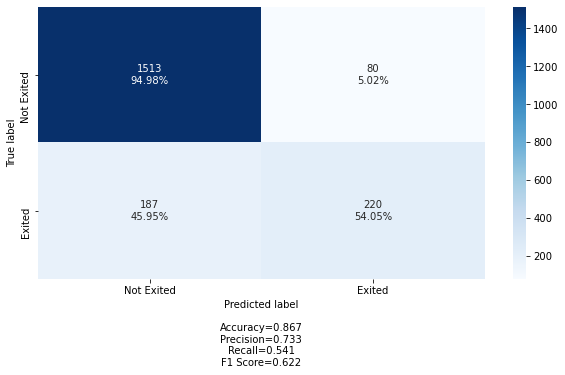

In [22]:
churn_prediction_with_oversampling.plot_cf_matrix('test_set', normalize = 'true')